## **Load the vector embedding dataframes**

In [ ]:
# load saved vector embeddings dataframes
import pandas as pd

# count vectorizer Bag of words embeddings for new testament without short verses
# df_cv= pd.read_csv('df_cv_wo_embeddings.csv')

# tfidf uni-grams embeddings for new testament without short verses
df_tfidf = pd.read_csv('df_tfidf_wo_embeddings.csv')

# Word2vec embeddings for new testament (only without short verses)
df_w2v= pd.read_csv('df_w2v_wo_embeddings.csv')

# Doc2vec embeddings for new testament (only without short verses)
df_d2v = pd.read_csv('df_d2v_wo_embeddings.csv')

## **Inspect the data**

In [ ]:
#---------------DATA DISPLAY---------------------

# return the medadata on the embedding df
def embedding_info(df,embedding_name):
  print(f'embedding df name: {embedding_name}\n')
  print(df.info())
  print(f'\nnumber of rows: {len(df)}')
  print(f"number of columns: {df['label'].unique()}")
  print(f"number of columns: {len(df['label'].unique())}")
  return


# **Naive Bayes Classifier**

In [ ]:
# ----------------NAIVE BAYES CLASSIFIER-----------------

# import all libraries
from sklearn.model_selection import train_test_split
# import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix, classification_report, confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt



# package the naive bayes model_building and evaluation in a single function
def build_nb(embedding_df,embedding_name):

  # Split the data into X and y ['label']
  X_cv_wo = embedding_df.drop('label', axis=1)
  y_cv_wo = embedding_df['label']

  # encode the label column

  le = LabelEncoder()
  y_cv_wo = le.fit_transform(y_cv_wo)

  # split the  (stratified sampling to ensure equal ratio distribution of the classes in both train and test)
  X_train, X_test, y_train,y_test = train_test_split(X_cv_wo,y_cv_wo,test_size=0.2, random_state=100, stratify=y_cv_wo)

  # using Naive Bayes classifier
  # instantiate the model
  nb_model = MultinomialNB()
  # fit the model
  nb_model.fit(X_train, y_train)

  # validation
  y_train_pred = nb_model.predict(X_train)
  y_test_pred = nb_model.predict(X_test)
  print(f'model name: MultinomialNB ')
  print(f'embedding used: {embedding_name}')
  print(f'train_accuracy_score: {accuracy_score(y_train, y_train_pred)}')
  print(f'test_accuracy_score: {accuracy_score(y_test, y_test_pred)}')
  print(f'train_f1_score: {f1_score(y_train, y_train_pred, average="weighted")}')
  print(f'test_f1_score: {f1_score(y_test, y_test_pred, average="weighted")}\n')

  # print(f'classification_report: \n{classification_report(y_test, y_pred)}')

  #confusion matrix
  cm = confusion_matrix(y_test, y_test_pred)

  # plot the confusion matrix
  sns.heatmap(cm, annot=True, fmt='g')
  print('')
  print('confusion matrix plot')
  plt.axis('equal')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

  return

## BOW

model name: MultinomialNB 
embedding used: bag of words
train_accuracy_score: 0.6341770161924226
test_accuracy_score: 0.39094908862350725
train_f1_score: 0.608253858337008
test_f1_score: 0.34946860815789754


confusion matrix plot


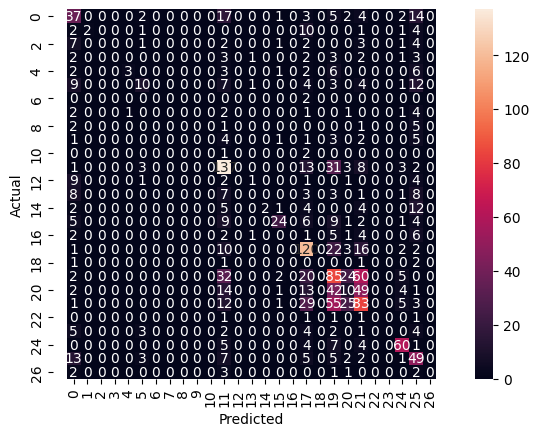

In [ ]:
# call the pre-defined model function
build_nb(df_cv,'bag of words')

### Tf-idf uni-gram

In [ ]:
# display the metadata
embedding_info(df_tfidf,'tfidf')

embedding df name: tfidf

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7952 entries, 0 to 7951
Columns: 4730 entries, aaron to label
dtypes: float64(4729), object(1)
memory usage: 287.0+ MB
None

number of rows: 7952
number of columns: ['matthew' 'mark' 'luke' 'john' 'acts' 'romans' '1 corinthians'
 '2 corinthians' 'galatians' 'ephesians' 'philippians' 'colossians'
 '1 thessalonians' '2 thessalonians' '1 timothy' '2 timothy' 'titus'
 'philemon' 'hebrews' 'james' '1 peter' '2 peter' '1 john' '2 john'
 '3 john' 'jude' 'revelation']
number of columns: 27


model name: MultinomialNB 
embedding used: tfidf uni-gram
train_accuracy_score: 0.4911177487816381
test_accuracy_score: 0.3343808925204274
train_f1_score: 0.41394194362601605
test_f1_score: 0.270649706218838


confusion matrix plot


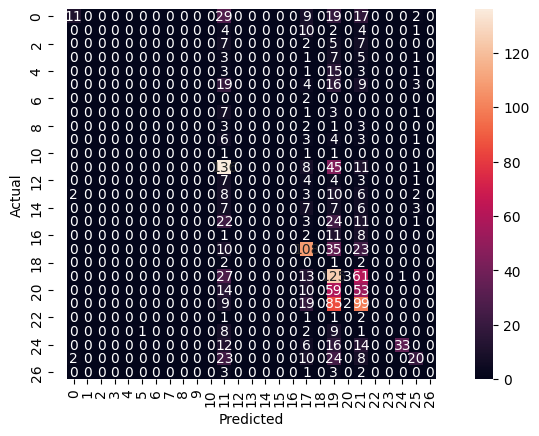

In [ ]:
# model tfidf
build_nb(df_tfidf,'tfidf uni-gram')

# **Logistic Regression Classifier**

In [ ]:
#-----------------LOGISTIC REGRESSION CLASSIFIER-------------------

# imports
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from matplotlib import pyplot as plt

# def the model
def build_lr(embedding_df,embedding_name):
  # Split the data into X and y ['label']
  X_cv_wo = embedding_df.drop('label', axis=1)
  y_cv_wo = embedding_df['label']

  # encode the label column

  le = LabelEncoder()
  y_cv_wo = le.fit_transform(y_cv_wo)

  # split the  (stratified sampling to ensure equal ratio distribution of the classes in both train and test)
  X_train, X_test, y_train,y_test = train_test_split(X_cv_wo,y_cv_wo,test_size=0.2, random_state=100, stratify=y_cv_wo)

  # model instance
  # lr_model= LogisticRegression()
  lr_model = LogisticRegression(class_weight='balanced', solver='saga', max_iter=1000)

  # fit the model
  lr_model.fit(X_train, y_train)

  # evaluation on validation/test data
  y_train_pred = lr_model.predict(X_train)
  y_test_pred = lr_model.predict(X_test)

  print(f'model name: Logistic Regression')
  print(f'embedding used: {embedding_name}')
  print(f'train_accuracy_score: {accuracy_score(y_train, y_train_pred):.4f}')
  print(f'train_f1_score: {f1_score(y_train, y_train_pred, average="weighted"):.4f}')
  print(f'test_accuracy_score: {accuracy_score(y_test, y_test_pred):.4f}')
  print(f'teat_f1_score: {f1_score(y_test, y_test_pred, average="weighted"):.4f}\n')

  # confusion matrix on test
  plt.figure(figsize=(12,8))
  cm=confusion_matrix(y_test_pred,y_test)
  sns.heatmap(cm,xticklabels=lr_model.classes_,yticklabels=lr_model.classes_,annot=True,cmap='Blues')
  plt.axis('equal')
  plt.title('Confusion Matrix on test data')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.xticks(rotation=90)
  plt.tight_layout()
  plt.show()

  return




## TF-IDF unigrams

In [ ]:
# inspect tfidf embeddings
embedding_info(df_tfidf,'tfidf')

embedding df name: tfidf

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7952 entries, 0 to 7951
Columns: 4730 entries, aaron to label
dtypes: float64(4729), object(1)
memory usage: 287.0+ MB
None

number of rows: 7952
number of columns: ['matthew' 'mark' 'luke' 'john' 'acts' 'romans' '1 corinthians'
 '2 corinthians' 'galatians' 'ephesians' 'philippians' 'colossians'
 '1 thessalonians' '2 thessalonians' '1 timothy' '2 timothy' 'titus'
 'philemon' 'hebrews' 'james' '1 peter' '2 peter' '1 john' '2 john'
 '3 john' 'jude' 'revelation']
number of columns: 27


In [ ]:
# model tfidf embeddings
build_lr(df_tfidf,'tfidf')

## Tf-idf bi-grams

***The embeddings for tf-idf bi-grams shot to 1.5 GB in file size, so i did not model the vector embedding, due to compute limitation.***

In [ ]:
# load the data
import pandas as pd
df_tfidf_bi = pd.read_csv('df_tfidf_ngram_wo_embeddings.csv')

In [ ]:
# inspect the data
embedding_info(df_tfidf_bi,'tfidf bi-grams')

NameError: name 'embedding_info' is not defined

In [ ]:
# build the model
build_lr(df_tfidf_bi,'tfidf bi-grams')

### word2vec

model name: Logistic Regression
embedding used: word2vec
train_accuracy_score: 0.0964
train_f1_score: 0.0797
test_accuracy_score: 0.0911
teat_f1_score: 0.0741



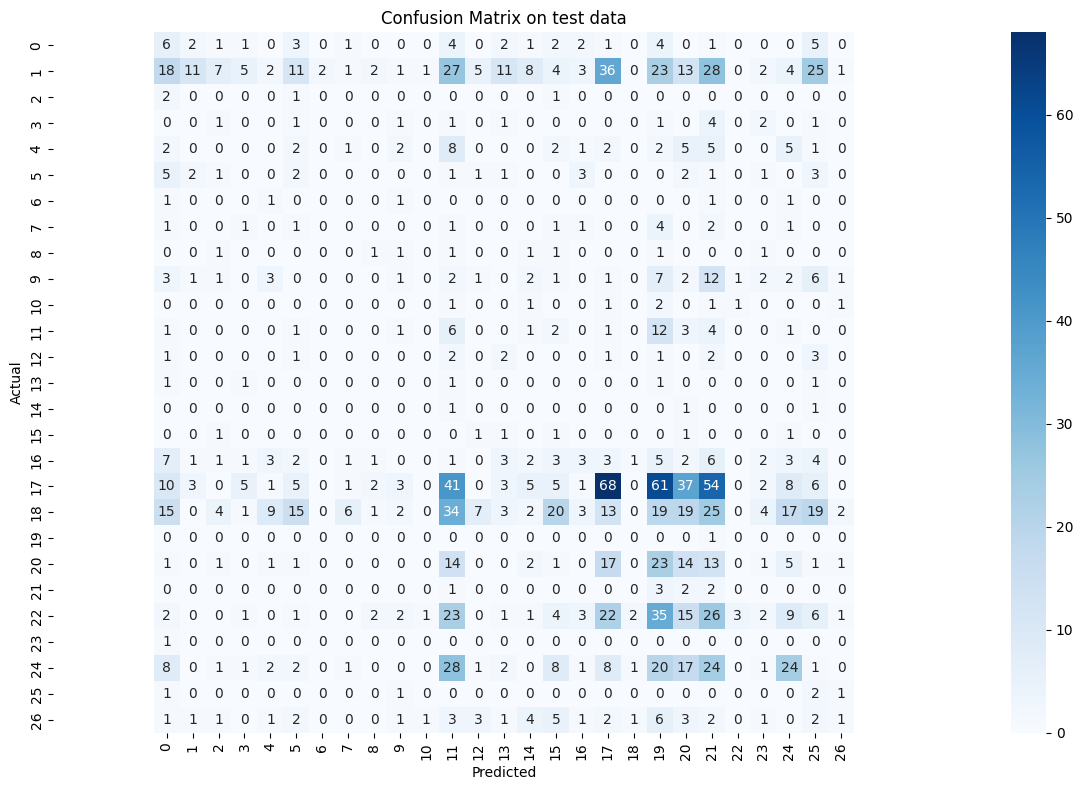

In [ ]:
# build the model
build_lr(df_w2v,'word2vec')

### doc2vec

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


model name: Logistic Regression
embedding used: doc2vec
train_accuracy_score: 0.2699
train_f1_score: 0.2700
test_accuracy_score: 0.2131
teat_f1_score: 0.2143



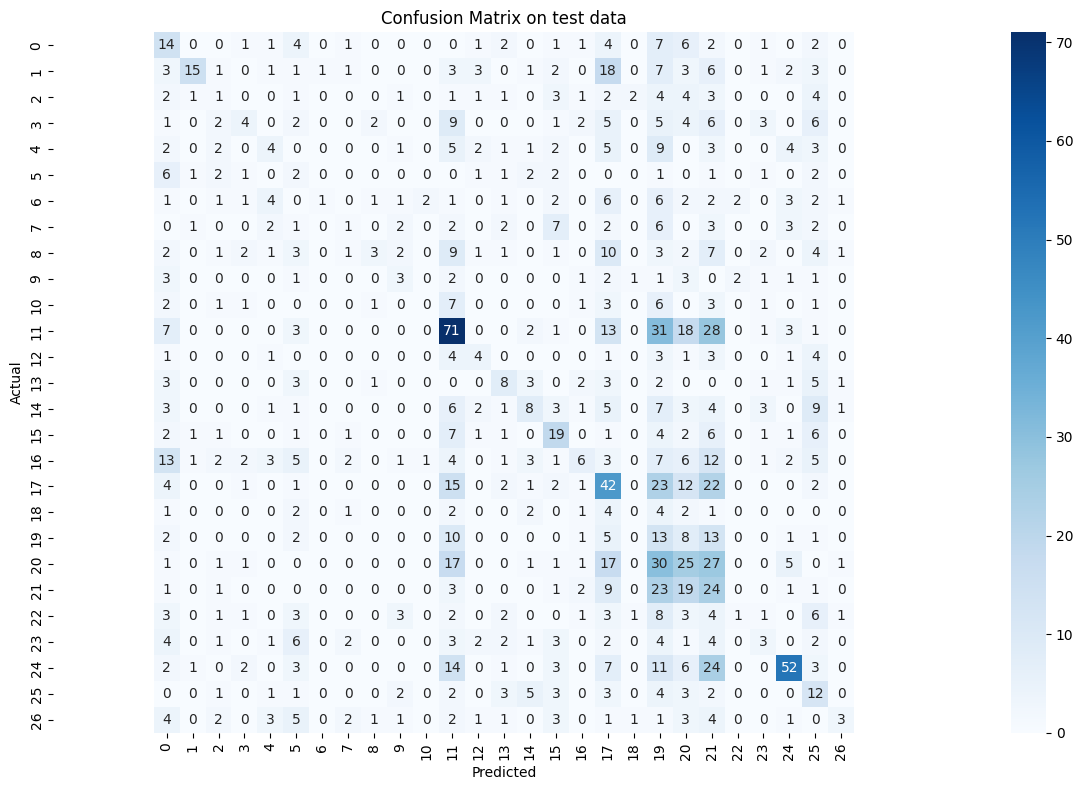

In [ ]:
# build the model
build_lr(df_d2v,'doc2vec')

# **Random Forest Classifier**

In [ ]:
#------------RANDOM FOREST CLASSIFIER----------------

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, confusion_matrix

def build_rfc_imbalanced(embedding_df,embedding_name):
  # Split the data into X and y ['label']
  X_cv_wo = embedding_df.drop('label', axis=1)
  y_cv_wo = embedding_df['label']

  # encode the label column

  le = LabelEncoder()
  y_cv_wo = le.fit_transform(y_cv_wo)

  # split the  (stratified sampling to ensure equal ratio distribution of the classes in both train and test)
  X_train, X_test, y_train,y_test = train_test_split(X_cv_wo,y_cv_wo,test_size=0.2, random_state=100, stratify=y_cv_wo)

  # model instance
  rfc_model = RandomForestClassifier(n_estimators=100,class_weight='balanced', random_state=100,n_jobs=-1)
  # fit the model
  rfc_model.fit(X_train, y_train)

  # evaluation on validation/test data
  y_train_pred = rfc_model.predict(X_train)
  y_test_pred = rfc_model.predict(X_test)

  print(f'model name: Random Forest Classifier')
  print(f'embedding used: {embedding_name}')
  print(f'train_accuracy_score: {accuracy_score(y_train, y_train_pred):.4f}')
  print(f'train_f1_score: {f1_score(y_train, y_train_pred, average="weighted"):.4f}')
  print(f'test_accuracy_score: {accuracy_score(y_test, y_test_pred):.4f}')
  print(f'teat_f1_score: {f1_score(y_test, y_test_pred, average="weighted"):.4f}\n')

  # confusion matrix on test
  plt.figure(figsize=(12,8))
  cm=confusion_matrix(y_test_pred,y_test)
  sns.heatmap(cm,xticklabels=rfc_model.classes_,yticklabels=rfc_model.classes_,annot=True,cmap='Blues')
  plt.axis('equal')
  plt.title('Confusion Matrix on test data')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.xticks(rotation=90)
  plt.tight_layout()
  plt.show()

  return

In [ ]:
#------------RANDOM FOREST CLASSIFIER----------------USING SMOTE for balancing classes-------------

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, confusion_matrix

def build_rfc_balanced(embedding_df,embedding_name):
  # Split the data into X and y ['label']
  X_cv_wo = embedding_df.drop('label', axis=1)
  y_cv_wo = embedding_df['label']

  # encode the label column
  le = LabelEncoder()
  y_cv_wo = le.fit_transform(y_cv_wo)

  # use SMOTE to oversample minority class samples
  smote = SMOTE(random_state=100)
  X_cv_wo, y_cv_wo = smote.fit_resample(X_cv_wo, y_cv_wo)

  # split the  (stratified sampling to ensure equal ratio distribution of the classes in both train and test)
  X_train, X_test, y_train,y_test = train_test_split(X_cv_wo,y_cv_wo,test_size=0.2, random_state=100, stratify=y_cv_wo)

  # model instance
  rfc_model = RandomForestClassifier(n_estimators=100,class_weight='balanced', random_state=100,n_jobs=-1)
  # fit the model
  rfc_model.fit(X_train, y_train)

  # evaluation on validation/test data
  y_train_pred = rfc_model.predict(X_train)
  y_test_pred = rfc_model.predict(X_test)

  print(f'model name: Random Forest Classifier')
  print(f'embedding used: {embedding_name}')
  print(f'train_accuracy_score: {accuracy_score(y_train, y_train_pred):.4f}')
  print(f'train_f1_score: {f1_score(y_train, y_train_pred, average="weighted"):.4f}')
  print(f'test_accuracy_score: {accuracy_score(y_test, y_test_pred):.4f}')
  print(f'test_f1_score: {f1_score(y_test, y_test_pred, average="weighted"):.4f}\n')

  # confusion matrix on test
  plt.figure(figsize=(12,8))
  cm=confusion_matrix(y_test_pred,y_test)
  sns.heatmap(cm,xticklabels=rfc_model.classes_,yticklabels=rfc_model.classes_,annot=True,cmap='Blues')
  plt.axis('equal')
  plt.title('Confusion Matrix on test data')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.xticks(rotation=90)
  plt.tight_layout()
  plt.show()

  return

### tfidf uni-gram (without balancing classes)

model name: Random Forest Classifier
embedding used: tfidf uni-gram
train_accuracy_score: 0.9973
train_f1_score: 0.9974
test_accuracy_score: 0.3243
teat_f1_score: 0.3004



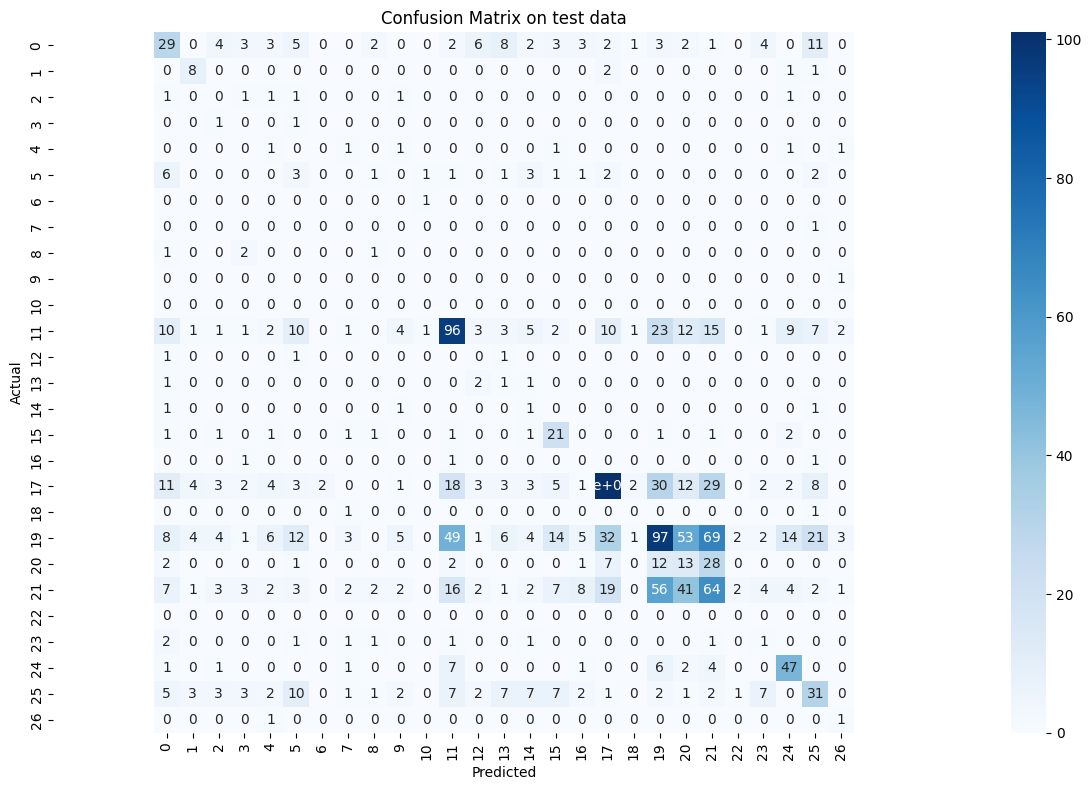

In [ ]:
# build model
build_rfc_imbalanced(df_tfidf,'tfidf uni-gram')

### tdidf uni-gram (with SMOTE re-sampling)

model name: Random Forest Classifier
embedding used: tfidf uni-gram
train_accuracy_score: 0.9991
train_f1_score: 0.9991
test_accuracy_score: 0.8939
test_f1_score: 0.8933



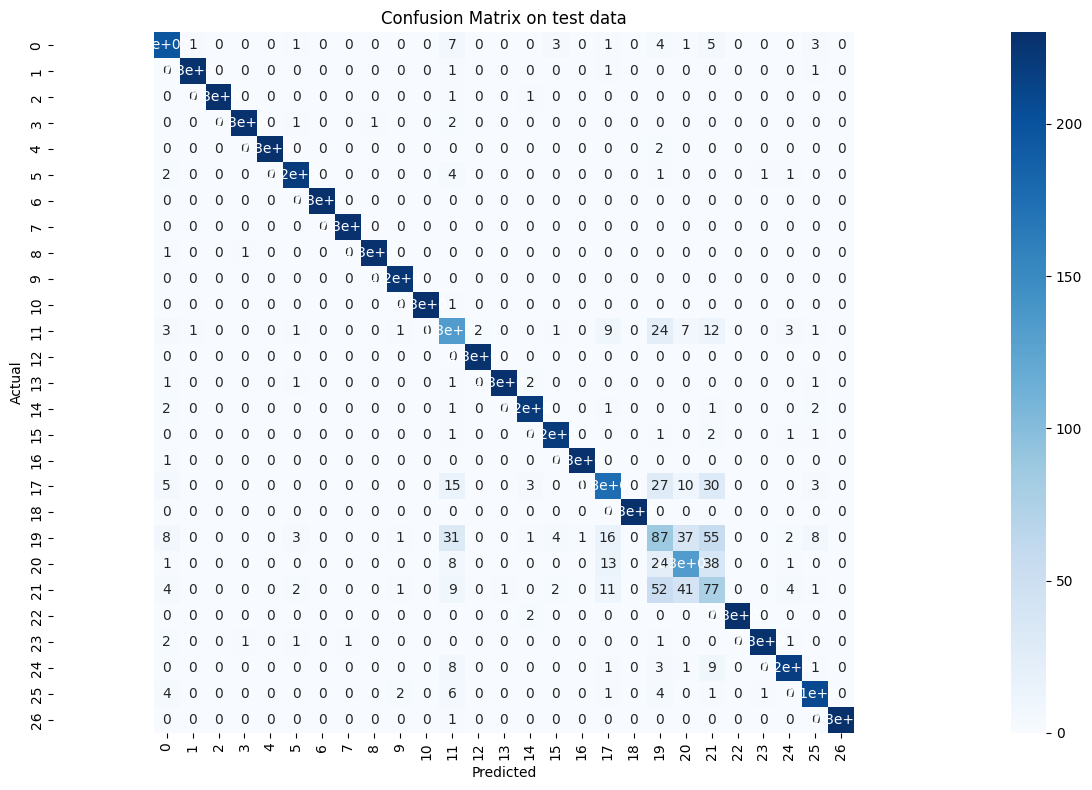

In [ ]:
# build the model
build_rfc_balanced(df_tfidf,'tfidf uni-gram')

### word2vec (no smote)

model name: Random Forest Classifier
embedding used: word2vec
train_accuracy_score: 0.9978
train_f1_score: 0.9978
test_accuracy_score: 0.1955
teat_f1_score: 0.1711



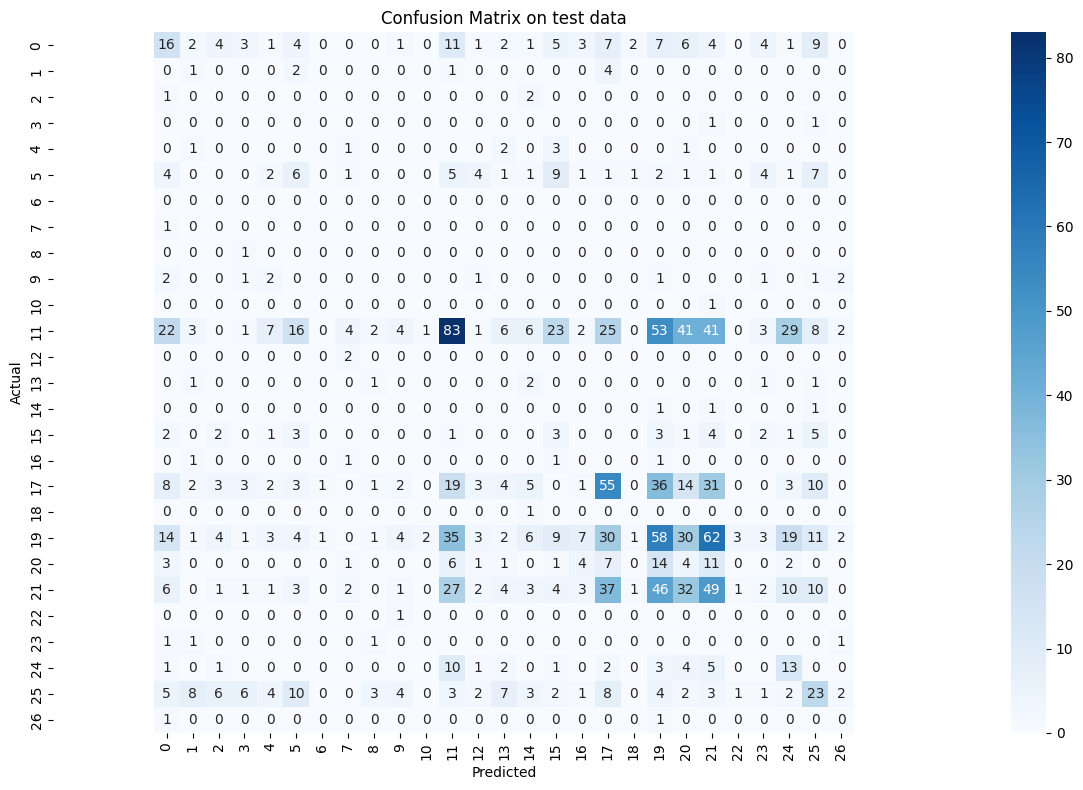

In [ ]:
# build the model
build_rfc_imbalanced(df_w2v,'word2vec')

### word2vec (using SMOTE for class sample balancing)

model name: Random Forest Classifier
embedding used: word2vec
train_accuracy_score: 0.9993
train_f1_score: 0.9993
test_accuracy_score: 0.8383
test_f1_score: 0.8218



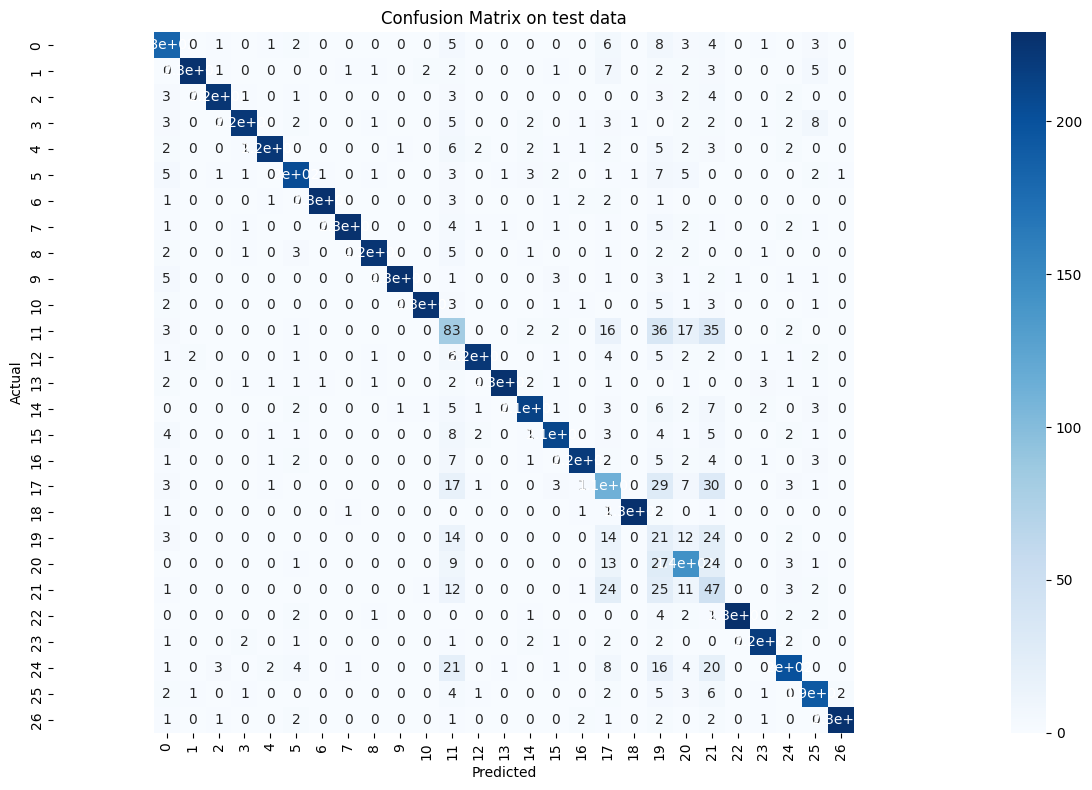

In [ ]:
# build the model
build_rfc_balanced(df_w2v,'word2vec')

### doc2vec

model name: Random Forest Classifier
embedding used: doc2vec
train_accuracy_score: 1.0000
train_f1_score: 1.0000
test_accuracy_score: 0.2458
teat_f1_score: 0.2163



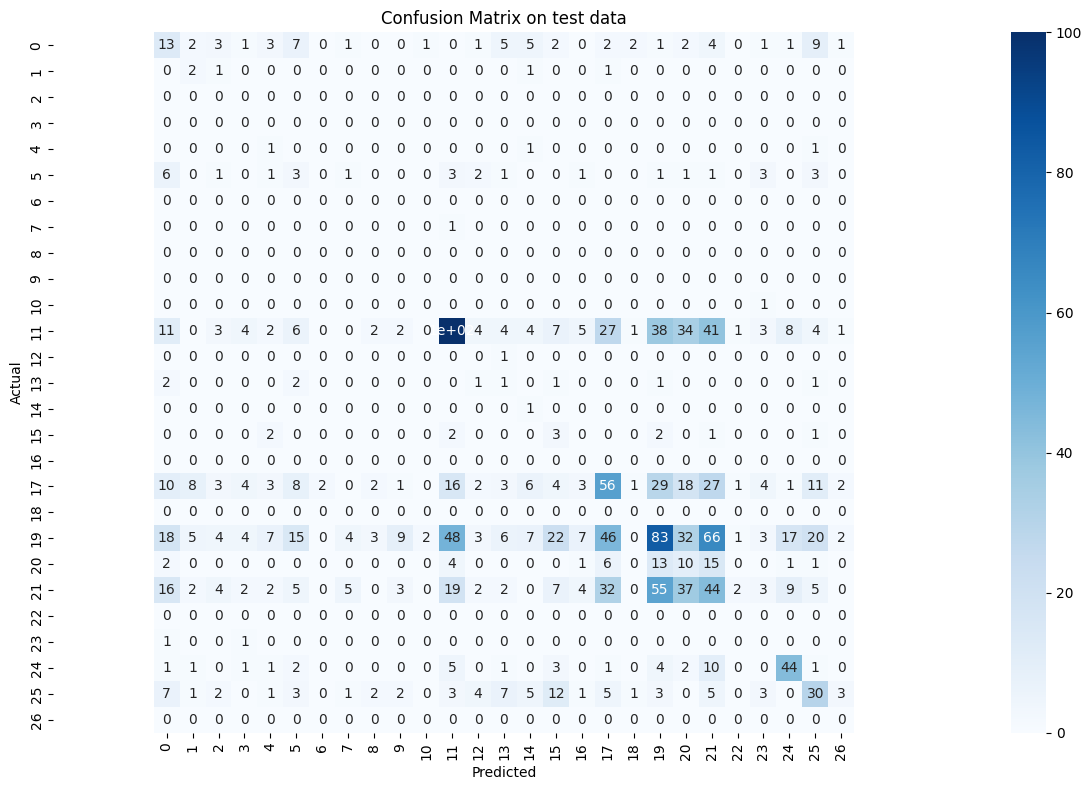

In [ ]:
# build the model
build_rfc_imbalanced(df_d2v,'doc2vec')

### doc2vec (using SMOTE)

model name: Random Forest Classifier
embedding used: doc2vec
train_accuracy_score: 1.0000
train_f1_score: 1.0000
test_accuracy_score: 0.8689
test_f1_score: 0.8587



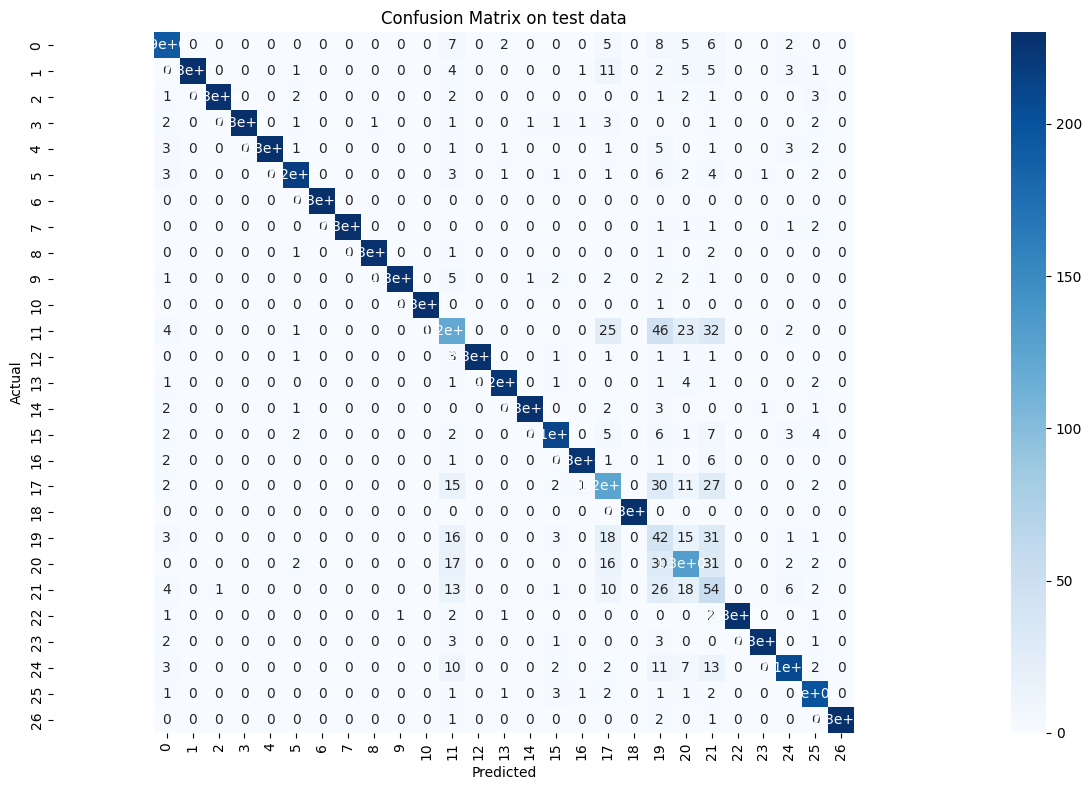

In [ ]:
# build the model
build_rfc_balanced(df_d2v,'doc2vec')

# **SVM Classifier**

In [ ]:
#--------------------SVC-----------------------

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, confusion_matrix

def build_svc(embedding_df,embedding_name):
  # Split the data into X and y ['label']
  X_cv_wo = embedding_df.drop('label', axis=1)
  y_cv_wo = embedding_df['label']

  # encode the label column
  le = LabelEncoder()
  y_cv_wo = le.fit_transform(y_cv_wo)

  # use SMOTE to oversample minority class samples
  smote = SMOTE(random_state=100)
  X_cv_wo, y_cv_wo = smote.fit_resample(X_cv_wo, y_cv_wo)

  # split the  (stratified sampling to ensure equal ratio distribution of the classes in both train and test)
  X_train, X_test, y_train,y_test = train_test_split(X_cv_wo,y_cv_wo,test_size=0.2, random_state=100, stratify=y_cv_wo)

  # scale the data (important for SVM)
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  # model instance
  svc_model = SVC(kernel='linear', class_weight='balanced',random_state=100)
  # fit the model
  svc_model.fit(X_train, y_train)

  # evaluation on validation/test data
  y_train_pred = svc_model.predict(X_train)
  y_test_pred = svc_model.predict(X_test)

  print(f'model name: Random Forest Classifier')
  print(f'embedding used: {embedding_name}')
  print(f'train_accuracy_score: {accuracy_score(y_train, y_train_pred):.4f}')
  print(f'train_f1_score: {f1_score(y_train, y_train_pred, average="weighted"):.4f}')
  print(f'test_accuracy_score: {accuracy_score(y_test, y_test_pred):.4f}')
  print(f'test_f1_score: {f1_score(y_test, y_test_pred, average="weighted"):.4f}\n')

  # confusion matrix on test
  plt.figure(figsize=(12,8))
  cm=confusion_matrix(y_test_pred,y_test)
  sns.heatmap(cm,xticklabels=svc_model.classes_,yticklabels=svc_model.classes_,annot=True,cmap='Blues')
  plt.axis('equal')
  plt.title('Confusion Matrix on test data')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.xticks(rotation=90)
  plt.tight_layout()
  plt.show()

  return

### word2vec

model name: Random Forest Classifier
embedding used: word2vec
train_accuracy_score: 0.7302
train_f1_score: 0.7199
test_accuracy_score: 0.6926
test_f1_score: 0.6804



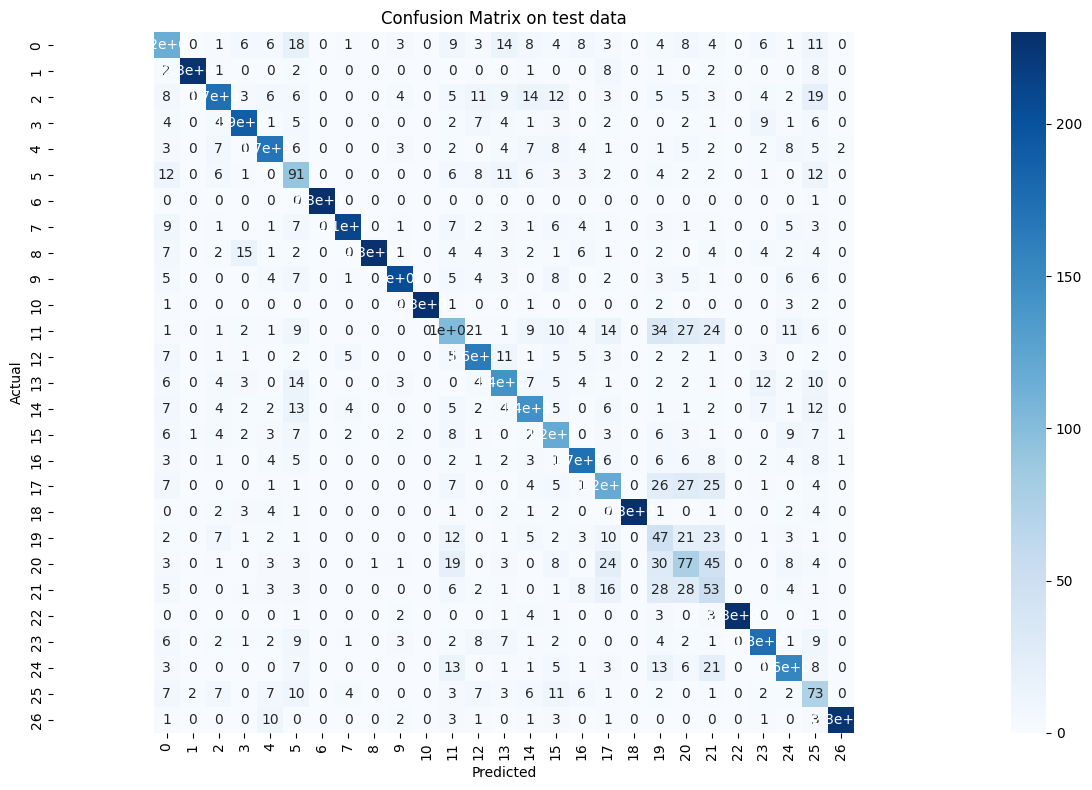

In [ ]:
# build the model
build_svc(df_w2v,'word2vec')

# **XGBoost Classifier**

In [ ]:
# -------------------XGBoost-------------------
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, confusion_matrix

def build_xgboost(embedding_df, embedding_name):

  # split the data into data and label
  X = embedding_df.drop('label',axis=1)
  y = embedding_df['label']

  # encode the label as numerical using label encoder
  le = LabelEncoder()
  y = le.fit_transform(y)

  # split the data into train and test
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=100, stratify = y)

  # create model instance
  xgb_model = XGBClassifier(
      objective='multi:softmax',
      num_class = len(le.classes_),
      eval_metric='mlogloss',
      random_state=100  ,
      n_jobs = -1)

  # fit the model
  xgb_model.fit(X_train, y_train)

  # evaluation on validation/test data
  y_train_pred = xgb_model.predict(X_train)
  y_test_pred = xgb_model.predict(X_test)

  print(f'model name: Random Forest Classifier')
  print(f'embedding used: {embedding_name}')
  print(f'train_accuracy_score: {accuracy_score(y_train, y_train_pred):.4f}')
  print(f'train_f1_score: {f1_score(y_train, y_train_pred, average="weighted"):.4f}')
  print(f'test_accuracy_score: {accuracy_score(y_test, y_test_pred):.4f}')
  print(f'test_f1_score: {f1_score(y_test, y_test_pred, average="weighted"):.4f}\n')

  # confusion matrix on test
  plt.figure(figsize=(12,8))
  cm=confusion_matrix(y_test_pred,y_test)
  sns.heatmap(cm,xticklabels=xgb_model.classes_,yticklabels=xgb_model.classes_,annot=True,cmap='Blues')
  plt.axis('equal')
  plt.title('Confusion Matrix on test data')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.xticks(rotation=90)
  plt.tight_layout()
  plt.show()

  return

### word2vec

model name: Random Forest Classifier
embedding used: word2vec
train_accuracy_score: 0.9976
train_f1_score: 0.9977
test_accuracy_score: 0.2143
test_f1_score: 0.1990



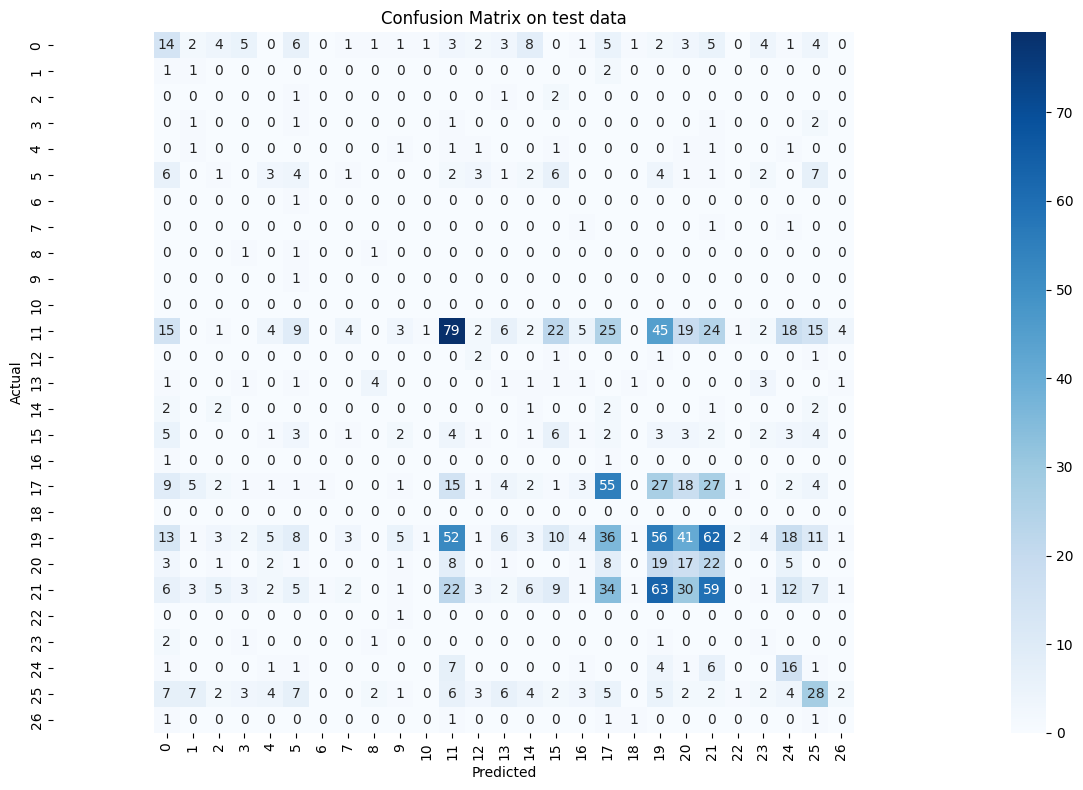

In [ ]:
# build the model
build_xgboost(df_w2v,'word2vec')

### xgboost **classifier**

model name: Random Forest Classifier
embedding used: doc2vec
train_accuracy_score: 1.0000
train_f1_score: 1.0000
test_accuracy_score: 0.2652
test_f1_score: 0.2474



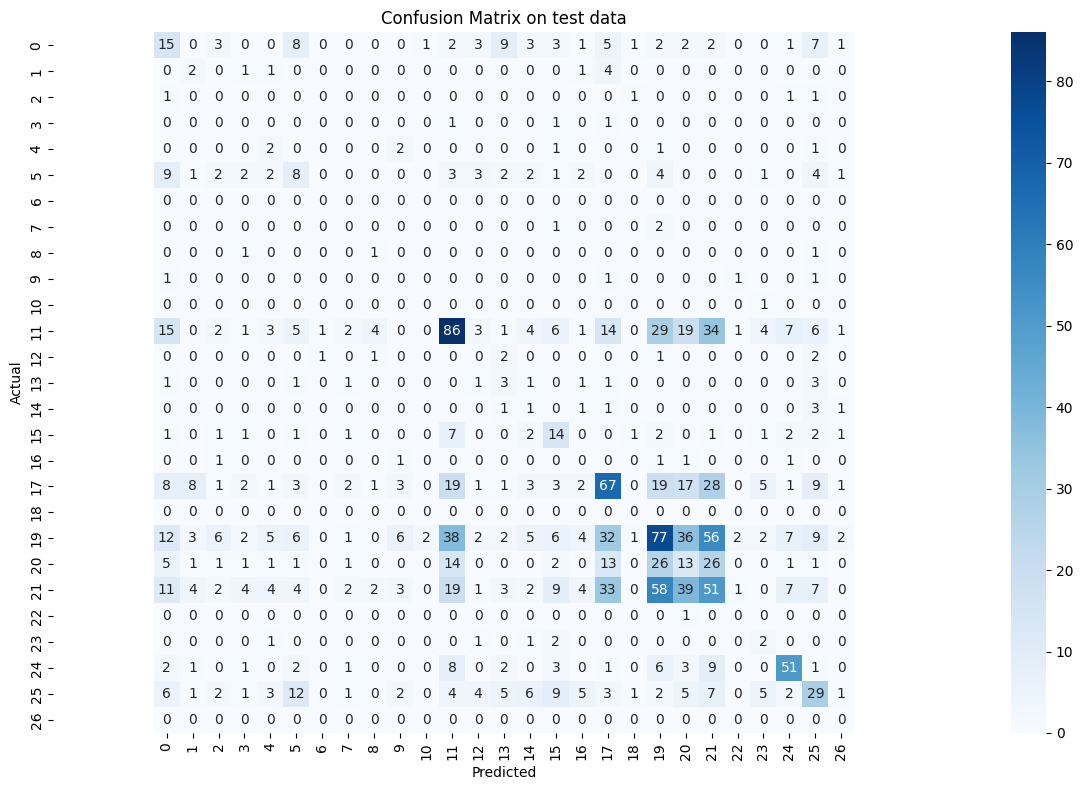

In [ ]:
# build the model
build_xgboost(df_d2v,'doc2vec')